## Binary Classifier Project Detail
### In machine learning, there are many methods used for binary classification. The most common are:

1. Logistic Regression
2. Naive Bayes
3. Decision Trees 
4. Nearest Neighbor
5. Neural Networks

`Hence, we'll be using some of these algorithms!`

### 

### Importing & installing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV

## Preparing Data

In [3]:
df = pd.read_csv('World_Bank_Projects_downloaded_6_15_2022.csv')
df.head(3)

,"World Bank Projects, data as of 03/29/2022 22:00:01 EST",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Project ID,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,Board Approval Date,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P169983,Africa East,Republic of Angola,Active,Third Angola Growth and Inclusion Development ...,The development objective is to support the Go...,Ministry of Finance of the Republic of Angola,NaN,http://projects.worldbank.org/P169983/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF ANGOLA,Development Policy Lending,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.rename(columns = {'World Bank Projects, data as of 03/29/2022 22:00:01 EST':'Project ID',
                         'Unnamed: 1':'Region',
                         'Unnamed: 2':'Country',
                         'Unnamed: 3':'Project Status',
                         'Unnamed: 4':'Project Name',
                         'Unnamed: 5':'Project Development Objective',
                         'Unnamed: 6':'Implementing Agency',
                         'Unnamed: 7':'Consultant Services Required',
                         'Unnamed: 8':'Project URL',
                         'Unnamed: 9':'Board Approval Date',
                          'Grant Amount':'Project Closing Date',
                          'Unnamed: 11':'Financing Type',
                          'Unnamed: 12':'Current Project Cost',
                          'Unnamed: 13':'IBRD Commitment',
                          'Unnamed: 14':'IDA Commitment',
                          'Unnamed: 15':'Total IDA and IBRD Commitment',
                         'Unnamed: 16':'Grant Amount',
                         'Unnamed: 17':'Borrower',
                         'Unnamed: 18':'Lending Instrument',
                         'Unnamed: 19':'Environmental Assessment Category',
                         'Unnamed: 20':'Environmental and Social Risk'})

df = df.drop(['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'],axis=1)
df = df.drop([0,1],axis=0)
df.reset_index(inplace=True)
df = df.drop(['index'],axis=1)
df['Grant Amount'] = df['Grant Amount'].astype(float)
df['Total IDA and IBRD Commitment'] = df['Total IDA and IBRD Commitment'].astype(float)
df['IDA Commitment'] = df['IDA Commitment'].astype(float)
df['IBRD Commitment'] = df['IBRD Commitment'].astype(float)
df['Current Project Cost'] = df['Current Project Cost'].astype(float)
df["Project Status"].replace({'Active':0,'Pipeline':0,'Closed':1, 'Dropped':1 }, inplace=True)

In [5]:
df.head(3)

,Project ID,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,Board Approval Date,...,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk
0,P169983,Africa East,Republic of Angola,0.0,Third Angola Growth and Inclusion Development ...,The development objective is to support the Go...,Ministry of Finance of the Republic of Angola,NaN,http://projects.worldbank.org/P169983/null?lan...,2022-03-25T00:00:00Z,...,IBRD,500000000.0,500000000.0,0.0,500000000.0,0.0,REPUBLIC OF ANGOLA,Development Policy Lending,NaN,NaN
1,P173711,Africa East,Republic of Madagascar,0.0,Connecting Madagascar for Inclusive Growth,The Project Development Objective is to improv...,Road Agency,NaN,http://projects.worldbank.org/P173711/null?lan...,2022-03-25T00:00:00Z,...,IDA,400000000.0,0.0,400000000.0,400000000.0,0.0,REPUBLIC OF MADAGASCAR,Investment Project Financing,NaN,NaN
2,P175747,Middle East and North Africa,Kingdom of Morocco,0.0,Resilient and Sustainable Water in Agriculture,The project development objectives (PDO) are t...,Ministry of Agriculture - Directorate of Irrig...,NaN,http://projects.worldbank.org/P175747/null?lan...,2022-03-25T00:00:00Z,...,IBRD,182250000.0,180000000.0,0.0,180000000.0,0.0,Kingdom of Morocco,Investment Project Financing,NaN,NaN


##### 

## Cleaning Data 

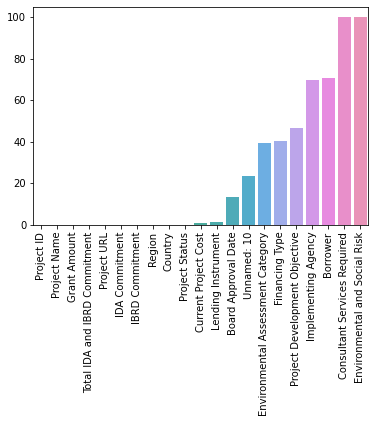

In [6]:
percent_nan = 100* df.isnull().sum() / len(df)
percent_nan = percent_nan.sort_values()

sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [7]:
df.isnull().sum()

Project ID                               0
Region                                   2
Country                                  2
Project Status                           3
Project Name                             0
Project Development Objective         9962
Implementing Agency                  14938
Consultant Services Required         21459
Project URL                              0
Board Approval Date                   2870
Unnamed: 10                           5029
Financing Type                        8611
Current Project Cost                   147
IBRD Commitment                          0
IDA Commitment                           0
Total IDA and IBRD Commitment            0
Grant Amount                             0
Borrower                             15170
Lending Instrument                     248
Environmental Assessment Category     8404
Environmental and Social Risk        21460
dtype: int64

In [8]:
df = df.drop(['Consultant Services Required','Environmental and Social Risk'],axis=1)

### Hence, more than 4 columns have 60+ percentage of nan values. We will clean the rest of the columns as per the algorithmic requirements.

##### 

### Filling nan values in Project Status & Project Development Objective column, which will be our target label & feature.

In [9]:
df['Project Status'].value_counts()

1.0    17425
0.0     4059
Name: Project Status, dtype: int64

In [10]:
df['Project Status'] = df['Project Status'].fillna(1)

In [11]:
data = df[['Project Status','Project Development Objective']]
data.isnull().sum()
data.dropna(axis=0,inplace=True)

##### 

## Training Models

## Training and Data

In [72]:
X = data['Project Development Objective']
y = data['Project Status']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### 

### 1. Naive Bayes & NLP

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])

In [100]:
# Feed the training data through the pipeline
pipe.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [101]:
from sklearn.metrics import classification_report,plot_confusion_matrix
preds = pipe.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69       807
         1.0       0.83      0.86      0.84      1498

    accuracy                           0.79      2305
   macro avg       0.77      0.76      0.77      2305
weighted avg       0.79      0.79      0.79      2305



In [77]:
from sklearn.metrics import classification_report,plot_confusion_matrix
preds = pipe.predict(X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69       807
         1.0       0.83      0.86      0.84      1498

    accuracy                           0.79      2305
   macro avg       0.77      0.76      0.77      2305
weighted avg       0.79      0.79      0.79      2305



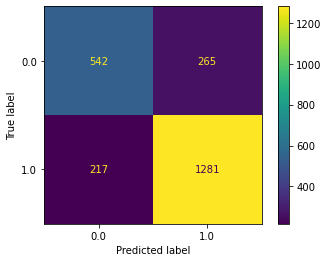

In [78]:
plot_confusion_matrix(pipe,X_test,y_test)

### 

## 

### 2. Logistic Regression

In [102]:
data2 = df[['Project Status','Region','Country','Current Project Cost','IBRD Commitment','IDA Commitment','Total IDA and IBRD Commitment','Grant Amount']]
data2 = data2.dropna(axis=0)

data2.select_dtypes(include='object')
df_nums = data2.select_dtypes(exclude='object')
df_objs = data2.select_dtypes(include='object')

df_objs = pd.get_dummies(df_objs,drop_first=True)

data2 = pd.concat([df_nums,df_objs],axis=1)
data2 = data2.astype(float)

In [103]:
X = data2.drop(['Project Status'],axis=1)
y = data2['Project Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Depending on warnings you may need to adjust max iterations allowed 
# Or experiment with different solvers
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)
log_model.fit(scaleX_train,y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', solver='saga')

### GridSearch for Best Hyper-Parameters

Tried GridSearch but it kept showing error. Will try to solve the problem later but the deadline was closing in so I submitted.

### Model Performance on Classification Tasks

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
y_pred = log_model.predict(X_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [24]:
accuracy_score(y_test,y_pred)

0.8020149953139644

In [25]:
confusion_matrix(y_test,y_pred)

array([[  10,  818],
       [  27, 3413]], dtype=int64)

## 

## 3. AdaBoost

In [12]:
data2 = df[['Project Status','Region','Country','Current Project Cost','IBRD Commitment','IDA Commitment','Total IDA and IBRD Commitment','Grant Amount']]
data2 = data2.dropna(axis=0)

data2.select_dtypes(include='object')
df_nums = data2.select_dtypes(exclude='object')
df_objs = data2.select_dtypes(include='object')

df_objs = pd.get_dummies(df_objs,drop_first=True)

data2 = pd.concat([df_nums,df_objs],axis=1)
data2 = data2.astype(float)

X = data2.drop(['Project Status'],axis=1)
y = data2['Project Status']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [13]:
param_grid = {"n_estimators":[40,41],
              'learning_rate':[0.2,0.3]}

from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
model = AdaBoostClassifier()

Grad_Boost_model = GridSearchCV(model,param_grid)

Grad_Boost_model.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.3], 'n_estimators': [40, 41]})

In [14]:
Grad_Boost_model.best_params_

{'learning_rate': 0.3, 'n_estimators': 41}

## Performance Evaluation

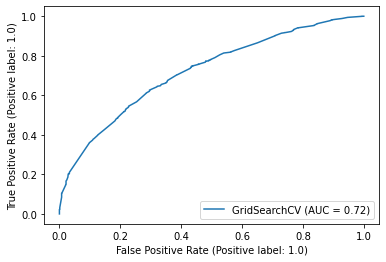

In [15]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve
plot_roc_curve(Grad_Boost_model,X_test,y_test)

In [17]:
#Ada Boost
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
y_Grad_Boost_model_pred = Grad_Boost_model.predict(X_test)
confusion_matrix(y_test,y_Grad_Boost_model_pred)

array([[  87,  741],
       [  65, 3375]], dtype=int64)

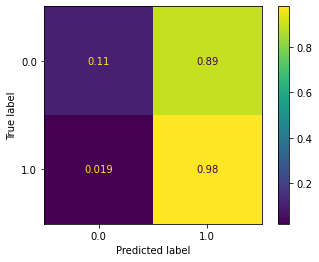

In [18]:
plot_confusion_matrix(Grad_Boost_model,X_test,y_test,normalize='true')

In [19]:
print(classification_report(y_test,y_Grad_Boost_model_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.11      0.18       828
         1.0       0.82      0.98      0.89      3440

    accuracy                           0.81      4268
   macro avg       0.70      0.54      0.54      4268
weighted avg       0.77      0.81      0.75      4268



# Concluding the models

## 1. Logistic Regression

In [71]:
b = np.array(X_test.iloc[953])
(log_model.predict_proba([b])[0][0]) * 100

49.67863279871061

In [69]:
def predict(Val):
    a = np.round(((log_model.predict_proba([Val])[0][0]) * 100),3)
    print('Chances of Cancellation are:',a,'%')

In [70]:
predict(np.array(X_test.iloc[953]))

Chances of Cancellation are: 49.679 %


# 

## 2. AdaBoost

In [21]:
d = np.array(X_test.iloc[953])
(Grad_Boost_model.predict_proba([d])[0][0]) * 100

45.712074653804706

In [24]:
def predict(Val):
    d = np.round(((Grad_Boost_model.predict_proba([Val])[0][0]) * 100),3)
    print('Chances of Cancellation are:',d,'%')

In [25]:
predict(np.array(X_test.iloc[953]))

Chances of Cancellation are: 45.712 %


### 

## Hence, we can predict the probability whether a project will be “closed” or “canceled/distressed”.